In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [36]:
# read data
data=pd.read_csv(r'D:\ML project & tasks\Datasets\data.csv')

In [37]:
# display first 5 row
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [38]:
# delet non important coulmns
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [39]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
# split data into x and y
x=data.drop(['diagnosis'],axis=1)
y=data['diagnosis']

In [41]:
# encoding
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
y=Encoder.fit_transform(y)

In [42]:
# split data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,shuffle=True,random_state=42)

In [43]:
# scaling 
from sklearn.preprocessing import MinMaxScaler

s=MinMaxScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [44]:
x_train.shape

(455, 30)

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [46]:
model=Sequential()

# first hidden layer
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=30))
model.add(Dropout(rate=.1)) # to prevent overfiting
# second hidden layer
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(rate=.1))
# third hidden layer
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(rate=.1))
#output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

F:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#compile model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [64]:
# model fiting
model_history=model.fit(x_train,y_train,epochs=150,validation_split=.2,batch_size=50)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6322 - loss: 0.6929 - val_accuracy: 0.6374 - val_loss: 0.6919
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6008 - loss: 0.6919 - val_accuracy: 0.6374 - val_loss: 0.6905
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6472 - loss: 0.6901 - val_accuracy: 0.6374 - val_loss: 0.6889
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6311 - loss: 0.6887 - val_accuracy: 0.6374 - val_loss: 0.6868
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6364 - loss: 0.6863 - val_accuracy: 0.6374 - val_loss: 0.6838
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6227 - loss: 0.6837 - val_accuracy: 0.6374 - val_loss: 0.6792
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6061 - loss: 0.6803 - val_accuracy: 0.6374 - val_loss: 0.6725
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6482 - loss: 0.6687 - val_accuracy: 0.6374 - val_loss: 0.662

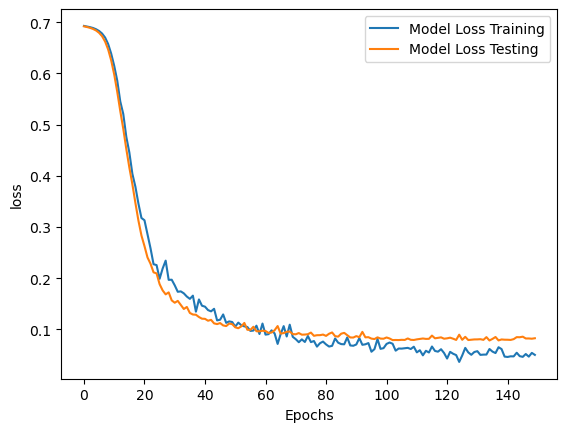

In [66]:
# plot
plt.plot(model_history.history['loss'],label='Model Loss Training')
plt.plot(model_history.history['val_loss'],label='Model Loss Testing')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

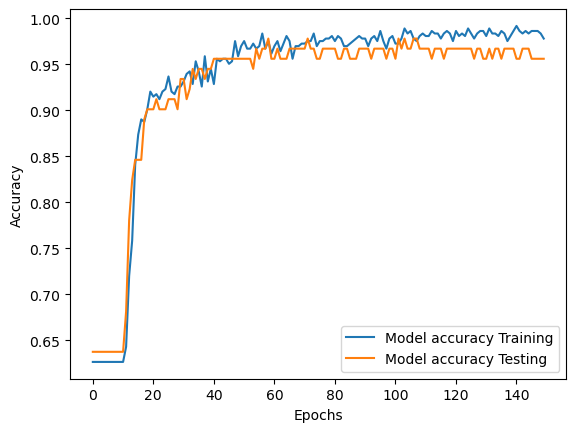

In [68]:
plt.plot(model_history.history['accuracy'],label='Model accuracy Training')
plt.plot(model_history.history['val_accuracy'],label='Model accuracy Testing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
# prediction the test set
y_pred=model.predict(x_test)
y_pred=(y_pred >= 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


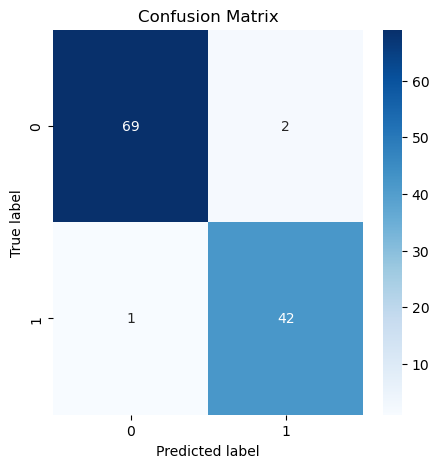

In [72]:
#plot confusion_matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.0f',cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [74]:
# print classification report
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test,digits=4))

              precision    recall  f1-score   support

       False     0.9718    0.9857    0.9787        70
        True     0.9767    0.9545    0.9655        44

    accuracy                         0.9737       114
   macro avg     0.9743    0.9701    0.9721       114
weighted avg     0.9737    0.9737    0.9736       114

